In [ ]:
from google.colab import drive;
drive.mount("/content/gdrive");

Mounted at /content/gdrive


In [ ]:
import pandas as pd;
df = pd.read_csv("/content/gdrive/MyDrive/Matrix Factorization/Matrix_Factorization_Assignment.csv");
df = df.sample(frac=0.70);
print(df.head(5));

       Index    0     1    2     3    4  ...  4994  4995  4996  4997  4998  4999
39802  12273  8.0   9.0  7.0   NaN  3.0  ...   1.0   1.0   3.0   9.0   NaN   2.0
34353  13407  9.0  10.0  2.0   4.0  5.0  ...  10.0   4.0   8.0   NaN   NaN   3.0
33153  13830  8.0   5.0  4.0   NaN  9.0  ...   NaN   5.0   NaN   4.0  10.0   4.0
44484  45071  NaN   NaN  2.0   4.0  NaN  ...   3.0   5.0   9.0   7.0   1.0   1.0
22601  24729  1.0   NaN  NaN  10.0  2.0  ...   2.0   6.0   7.0   NaN   NaN  10.0

[5 rows x 5001 columns]


In [ ]:
import numpy as np;
from sklearn import preprocessing;
from sklearn.metrics import mean_squared_error;
import matplotlib.pyplot as plt;

In [ ]:
## Delete row
# print(df.shape);
filtered_row_df = df[df['Index'] % 214 != 0];
# print(filtered_row_df);
# print(filtered_row_df.shape);
##Delete column
abandoned_cols = [str(i) for i in range(0,5000) if i % 214 == 0];
# print(abandoned_cols);
filtered_df = filtered_row_df.drop(abandoned_cols,axis = 1);
# print(filtered_df);
# print(filtered_df.shape);
filtered_df = filtered_df.fillna(0);
mod_filtered_df = filtered_df.drop(filtered_df[['Index']], axis=1);
print(mod_filtered_df.describe());
mod_filtered_df = mod_filtered_df.to_numpy();

print(mod_filtered_df.shape);
# print(mod_filtered_df[0][1]);

(31353, 4976)


## initialize λu and λv


In [ ]:
λu = (0.00015 + (0.0001 * (214 % 8)));
λv = (0.00025 - (0.0001 * (214 % 7)));
print(λu,λv);


0.00075 -0.00015000000000000001


## update 


In [ ]:
class MF():
  def __init__(self,R,K,lambda_u,lambda_v,iterations):
    self.R = R;
    self.num_users,self.num_items = R.shape;
    self.K  = K;
    self.lambda_u = lambda_u;
    self.lambda_v = lambda_v;
    self.iterations = iterations;
  def train(self):
      self.U = np.random.random((self.num_users, self.K))
      self.V = np.random.random((self.num_items, self.K))
      # print(self.U.shape);

      # #normalize
      self.normalized_U = preprocessing.normalize(self.U);
      self.normalized_V = preprocessing.normalize(self.V);

      # print(self.normalized_U.shape);

      
      
      self.train_mse = [];
      for _ in range(self.iterations):
        self.normalized_U = self.als_train(self.R,self.normalized_U,self.normalized_V,self.lambda_u);
        # print(self.normalized_U.shape);
        # print(self.normalized_U);
        self.normalized_V = self.als_train(self.R.transpose(),self.normalized_V,self.normalized_U,self.lambda_v);

        predictions = self.predict();
        train_mse = self.calculate_mse(self.R,predictions);
        self.train_mse.append(train_mse);
      return self;
  
  def als_train(self,ratings,solve_matrix , fix_matrix,param):
    test_part = fix_matrix.transpose().dot(fix_matrix);
    # print(test_part.shape);
    f_part = fix_matrix.transpose().dot(fix_matrix) + np.eye(self.K) * param;
    f_part_inv = np.linalg.inv(f_part);
    s_part = ratings.dot(fix_matrix);
    solve_matrix = s_part.dot(f_part_inv);
    
    return solve_matrix;


       
  #loss function
  def calculate_mse(self,y_true,y_pred):
    mask = np.nonzero(y_true);
    mse = mean_squared_error(y_true[mask], y_pred[mask]);
    return mse;
  def predict(self):
    pred = self.normalized_U.dot(self.normalized_V.transpose());
    print(pred[0][0:10]);
    return pred;


  


In [ ]:

mf =MF(mod_filtered_df,5,λu,λv,20);
mf.train();
mf1 =MF(mod_filtered_df,20,λu,λv,20);
mf1.train();
mf2 =MF(mod_filtered_df,100,λu,λv,20);
mf2.train();
mf3 =MF(mod_filtered_df,600,λu,λv,20);
mf3.train();

[3.02406348 3.32157886 3.21578056 3.14298431 3.21533519 2.79434911
 2.53166075 2.9031155  3.14255104 2.57052014]
[3.08093611 3.29941668 3.32248684 3.13246899 3.20483699 2.84224081
 2.51880495 2.94944526 3.18307746 2.53487681]
[3.10574789 3.25292056 3.39283909 3.13144123 3.17206937 2.90763278
 2.55710316 2.96543046 3.21700881 2.56566535]
[3.08195586 3.21865718 3.41347779 3.13734474 3.13059598 2.96981722
 2.60619392 2.9604569  3.24282609 2.62173816]
[3.03288797 3.20190303 3.40696795 3.14861341 3.0909275  3.01981043
 2.6530922  2.95250888 3.26634733 2.68114433]
[2.97878261 3.19826183 3.39143898 3.16274147 3.05700759 3.0552972
 2.69492128 2.94876295 3.2879407  2.73433494]
[2.93094199 3.20322877 3.37660184 3.17782406 3.02993011 3.0775049
 2.73147374 2.9499215  3.30631311 2.77841124]
[2.89384484 3.21364289 3.36634407 3.19273061 3.00946483 3.0888969
 2.76301629 2.95447192 3.32063869 2.8135027 ]
[2.86803532 3.22745203 3.36142771 3.20688845 2.99475599 3.09200858
 2.78988137 2.96070439 3.3308699

In [ ]:
def plot_data(model):
    linewidth = 3
    plt.plot(model.train_mse, label = 'Train', linewidth = linewidth)
    plt.xlabel('iterations')
    plt.ylabel('MSE')
    plt.legend(loc = 'best');
    plt.show();

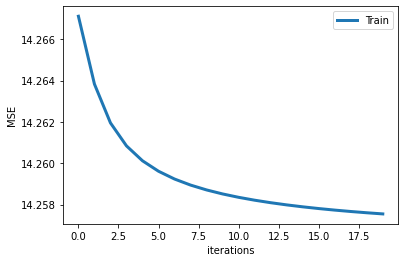

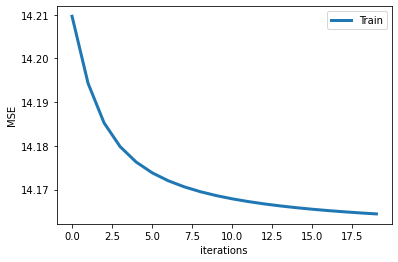

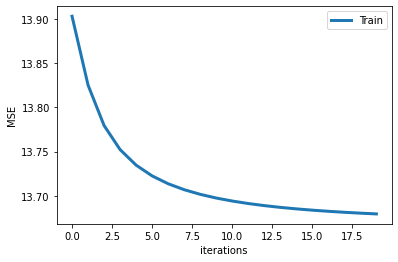

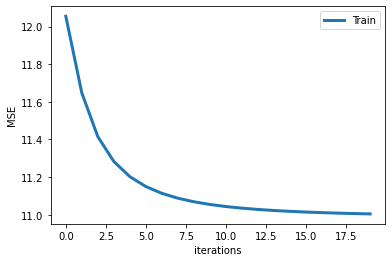

In [ ]:
plot_data(mf);
plot_data(mf1);
plot_data(mf2);
plot_data(mf3);

### Cosine similarity item


In [ ]:
from numpy import dot
from numpy.linalg import norm


def cosine_similarity(model):
  # print(model.normalized_U);
  cos_sim = dot(model.normalized_V, model.normalized_V.transpose())/(norm(model.normalized_V)*norm(model.normalized_V.transpose()));
  # cos_sim1 = dot(model.normalized_U, model.normalized_U.transpose())/(norm(model.normalized_U)*norm(model.normalized_U.transpose()));
  # print(cos_sim);
  # print(cos_sim1);
def cosine_similarity1(model):

  cos_sim = dot(model.normalized_V, model.normalized_V.transpose())/(norm(model.normalized_V)*norm(model.normalized_V.transpose()));
  # cos_sim1 = dot(model.normalized_U, model.normalized_U.transpose())/(norm(model.normalized_U)*norm(model.normalized_U.transpose()));
  # print(cos_sim);
  # print(cos_sim1);
def cosine_similarity2(model):

  cos_sim = dot(model.normalized_V, model.normalized_V.transpose())/(norm(model.normalized_V)*norm(model.normalized_V.transpose()));
  # cos_sim1 = dot(model.normalized_U, model.normalized_U.transpose())/(norm(model.normalized_U)*norm(model.normalized_U.transpose()));
  # print(cos_sim);
  # print(cos_sim1);
def cosine_similarity3(model):
  # print(model.normalized_U);
  cos_sim = dot(model.normalized_V, model.normalized_V.transpose())/(norm(model.normalized_V)*norm(model.normalized_V.transpose()));
  # cos_sim1 = dot(model.normalized_U, model.normalized_U.transpose())/(norm(model.normalized_U)*norm(model.normalized_U.transpose()));
  print(cos_sim);
  # print(cos_sim1);



In [ ]:
item_simlarity_mod1 = cosine_similarity(mf);
item_simlarity_mod2 = cosine_similarity1(mf1);
item_simlarity_mod3 = cosine_similarity2(mf2);
item_simlarity_mod4 = cosine_similarity3(mf3);

[[0.00020476 0.00014853 0.0001507  ... 0.0001357  0.00012848 0.00015612]
 [0.00014853 0.00021806 0.00016353 ... 0.00013725 0.00013268 0.00016034]
 [0.0001507  0.00016353 0.00023876 ... 0.00015105 0.00013992 0.00016937]
 ...
 [0.0001357  0.00013725 0.00015105 ... 0.00019374 0.00012725 0.0001474 ]
 [0.00012848 0.00013268 0.00013992 ... 0.00012725 0.00018772 0.00014873]
 [0.00015612 0.00016034 0.00016937 ... 0.0001474  0.00014873 0.00023488]]
